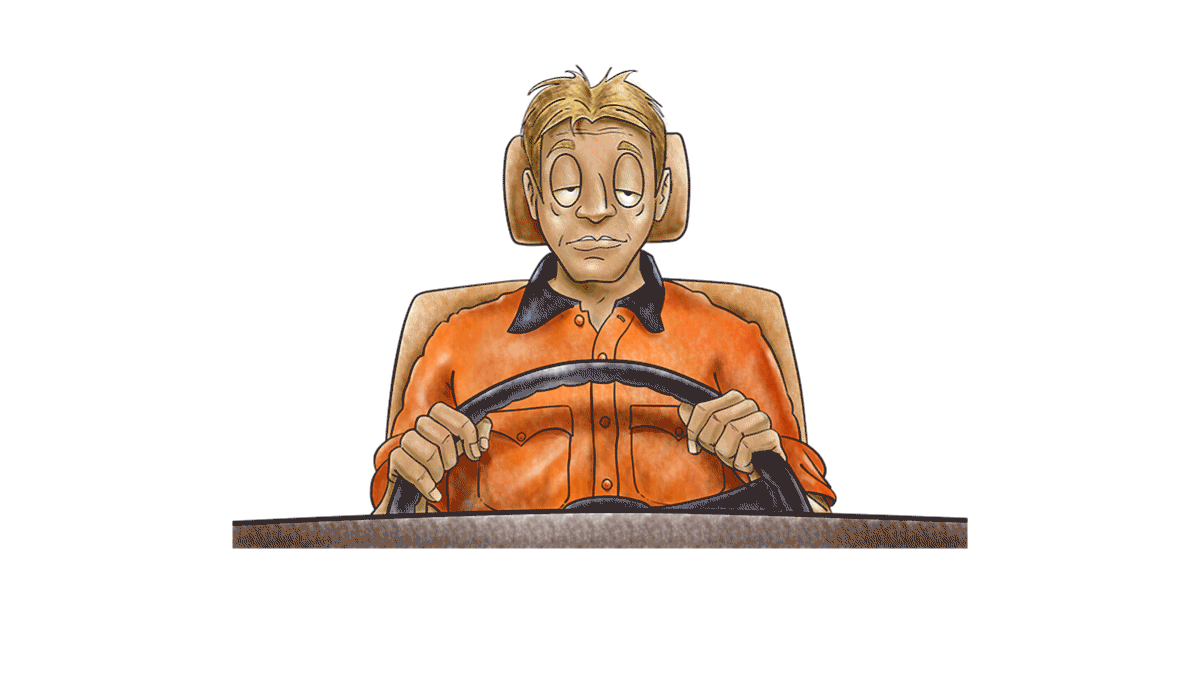

## Driver drowsiness detection is a car safety technology which helps prevent accidents caused by the driver getting drowsy. Various studies have suggested that around 20% of all road accidents are fatigue-related, up to 50% on certain roads.

In [11]:
import sys
print(sys.executable)
print(sys.version)


/opt/anaconda3/envs/drowsy/bin/python
3.10.19 (main, Oct 21 2025, 16:37:10) [Clang 20.1.8 ]


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

# labels

In [13]:
labels = os.listdir("./train")

In [14]:
labels

['Closed', 'no_yawn', 'yawn', 'Open']

# visualize random 1 image

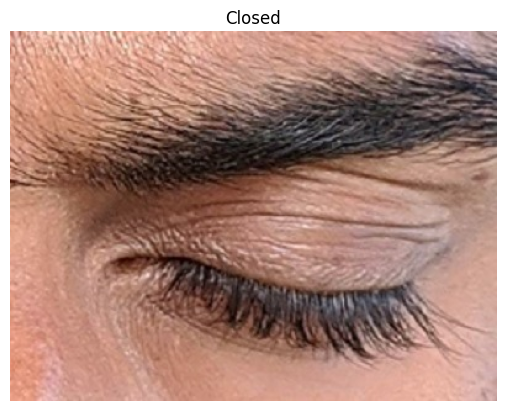

In [15]:
from pathlib import Path
import random
import matplotlib.pyplot as plt

TRAIN_DIR = Path("train")

# pick a random class folder
label = random.choice([d.name for d in TRAIN_DIR.iterdir() if d.is_dir()])

# pick a random image from that class folder
image_file = random.choice(list((TRAIN_DIR / label).glob("*.jpg")))

# display image
img = plt.imread(image_file)
plt.imshow(img)
plt.title(label)
plt.axis("off")
plt.show()


# image array

(-0.5, 253.5, 246.5, -0.5)

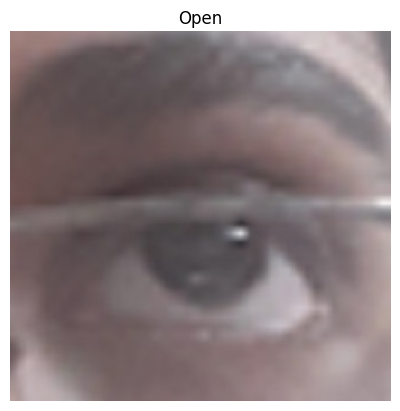

In [16]:
from pathlib import Path
import random
import matplotlib.pyplot as plt

DATASET_DIR = Path("train")

label = random.choice([d.name for d in DATASET_DIR.iterdir() if d.is_dir()])
image_path = random.choice(list((DATASET_DIR / label).glob("*.jpg")))

a = plt.imread(image_path)

plt.imshow(a)
plt.title(label)
plt.axis("off")


# image shape

In [17]:
a.shape

(247, 254, 3)

# visualize yawn image. 
# Here background is unnecessary. we need only face image array

(-0.5, 639.5, 479.5, -0.5)

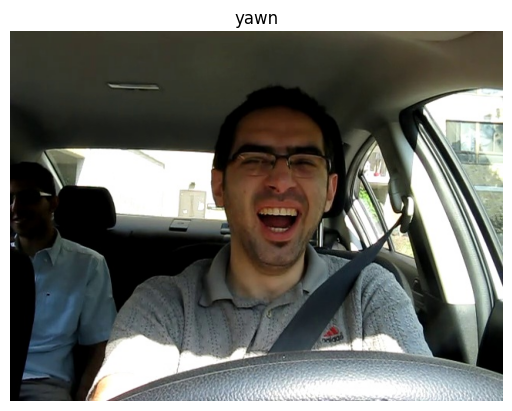

In [18]:
from pathlib import Path
import random
import matplotlib.pyplot as plt

DATASET_DIR = Path("train")
label = "yawn"   # or Closed / Open / no_yawn
image_path = random.choice(list((DATASET_DIR / label).glob("*.jpg")))

img = plt.imread(image_path)
plt.imshow(img)
plt.title(label)
plt.axis("off")


# for yawn and not_yawn. Take only face

In [19]:
from pathlib import Path
import cv2
import os

def face_for_yawn(direc="train", face_cas_path="haarcascade_frontalface_default.xml"):
    yawn_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]

    direc = Path(direc)

    for category in categories:
        path_link = direc / category
        class_num = categories.index(category)
        print("Processing:", category)

        for image in os.listdir(path_link):
            img_path = path_link / image
            image_array = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
            if image_array is None:
                continue

            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)

            for (x, y, w, h) in faces:
                roi_color = image_array[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yawn_no.append([resized_array, class_num])

    return yawn_no

In [20]:
yawn_no_yawn = face_for_yawn()


Processing: yawn
Processing: no_yawn


# for closed and open eye

In [21]:
from pathlib import Path
import cv2
import os

def get_data(dir_path="train"):
    data = []
    IMG_SIZE = 145
    labels = ["Closed", "Open"]

    dir_path = Path(dir_path)

    for label in labels:
        path = dir_path / label
        class_num = labels.index(label)

        print(f"Loading: {label} ({class_num})")

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(str(path / img), cv2.IMREAD_COLOR)
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([img_array, class_num])
            except Exception as e:
                continue

    return data


In [22]:
data_train = get_data()
len(data_train)


Loading: Closed (0)
Loading: Open (1)


1452

# extend data and convert array

In [23]:
def append_data():
    yawn_no = face_for_yawn()   # returns list
    eye_data = get_data()       # returns list
    combined = yawn_no + eye_data

    X = []
    y = []

    for features, label in combined:
        X.append(features)
        y.append(label)

    X = np.array(X).reshape(-1, 145, 145, 3)
    y = np.array(y)

    return X, y


# new variable to store

In [24]:
X, y = append_data()
X.shape, y.shape


Processing: yawn
Processing: no_yawn
Loading: Closed (0)
Loading: Open (1)


((1925, 145, 145, 3), (1925,))

# separate label and features

In [25]:
def append_data():
    yawn_no = face_for_yawn()     # list of [image, label]
    eye_data = get_data()         # list of [image, label]

    combined = yawn_no + eye_data

    X = []
    y = []

    for features, label in combined:
        X.append(features)
        y.append(label)

    X = np.array(X).reshape(-1, 145, 145, 3)
    y = np.array(y)

    return X, y


# reshape the array

In [26]:
X, y = append_data()
print(X.shape, y.shape)


Processing: yawn
Processing: no_yawn
Loading: Closed (0)
Loading: Open (1)
(1925, 145, 145, 3) (1925,)


# LabelBinarizer

In [27]:
import sys
print(sys.executable)


/opt/anaconda3/envs/drowsy/bin/python


In [28]:
import sklearn
print(sklearn.__version__)


1.7.2


In [29]:
import tensorflow as tf
import cv2
import mediapipe as mp
import numpy as np

print("TensorFlow:", tf.__version__)
print("NumPy:", np.__version__)
print("OpenCV:", cv2.__version__)
print("Mediapipe:", mp.__version__)
print("GPU:", tf.config.list_physical_devices("GPU"))


objc[64224]: Class CaptureDelegate is implemented in both /opt/anaconda3/envs/drowsy/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x16117a6b0) and /opt/anaconda3/envs/drowsy/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x300cc8860). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[64224]: Class CVWindow is implemented in both /opt/anaconda3/envs/drowsy/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x16117a700) and /opt/anaconda3/envs/drowsy/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x17cae8a68). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[64224]: Class CVView is implemented in both /opt/anaconda3/envs/drowsy/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x16117a728) and /opt/anaconda3/envs/drowsy/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dyl

TensorFlow: 2.15.0
NumPy: 1.23.5
OpenCV: 4.12.0
Mediapipe: 0.9.2.1
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# label array

In [30]:
import os
import cv2
import numpy as np

def load_dataset():
    base = "./train"  # your dataset folder
    classes = os.listdir(base)
    data = []
    
    for label_index, label_name in enumerate(classes):
        folder = os.path.join(base, label_name)
        print(f"Loading: {label_name}")
        for img_file in os.listdir(folder):
            img_path = os.path.join(folder, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (145,145))
            data.append((img, label_index))
    
    return data

new_data = load_dataset()
print("Samples Loaded:", len(new_data))


Loading: Closed
Loading: no_yawn
Loading: yawn
Loading: Open
Samples Loaded: 2900


In [31]:
X = []
y = []

for feature, label in new_data:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique labels:", np.unique(y))

X shape: (2900, 145, 145, 3)
y shape: (2900,)
Unique labels: [0 1 2 3]


In [32]:
X = X / 255.0   # Normalize


# train test split+one hot encoding

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

print("Train data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)


Train data: (2320, 145, 145, 3) (2320, 4)
Test data: (580, 145, 145, 3) (580, 4)


In [34]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert y_train back to class labels (remove one-hot)
y_train_labels = np.argmax(y_train, axis=1)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: 1.008695652173913, 1: 0.9931506849315068, 2: 1.0104529616724738, 3: 0.9880749574105622}


# length of X_test

In [35]:
len(X_test)

580

In [36]:
print("X_train min:", X_train.min(), "max:", X_train.max())
print("y_train example:", y_train[:5])


X_train min: 0.0 max: 1.0
y_train example: [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


# Not necessary, only use to matching with my pc version

In [37]:
# !pip install tensorflow==2.3.1
# !pip install keras==2.4.3

# import some dependencies

In [38]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# tensorflow version

In [39]:
tf.__version__

'2.15.0'

# keras version

In [40]:
import keras
keras.__version__

'2.15.0'

# Data Augmentation

In [41]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model

In [42]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

2025-11-11 15:05:12.135998: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-11-11 15:05:12.151014: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-11 15:05:12.151021: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-11 15:05:12.152960: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-11 15:05:12.154783: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 71, 71, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0

In [43]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert one-hot encoded y_train back to class numbers
y_train_labels = np.argmax(y_train, axis=1)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)

# Convert to dictionary form required by model.fit()
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: 1.008695652173913, 1: 0.9931506849315068, 2: 1.0104529616724738, 3: 0.9880749574105622}


In [44]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

IMG_SIZE = 145

base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze pretrained weights

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 145, 145, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 73, 73, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 73, 73, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 73, 73, 32)           0         ['bn_Conv1[0][0]']        

In [45]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=12,
    batch_size=32,
    class_weight=class_weights,
    shuffle=True
)

Epoch 1/12


2025-11-11 15:05:20.677715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


73/73 [==============================] - 12s 119ms/step - loss: 0.8077 - accuracy: 0.7737 - val_loss: 0.2879 - val_accuracy: 0.8966
Epoch 2/12
73/73 [==============================] - 4s 54ms/step - loss: 0.4020 - accuracy: 0.8608 - val_loss: 0.3207 - val_accuracy: 0.8517
Epoch 3/12
73/73 [==============================] - 4s 54ms/step - loss: 0.3094 - accuracy: 0.8832 - val_loss: 0.2382 - val_accuracy: 0.8966
Epoch 4/12
73/73 [==============================] - 4s 52ms/step - loss: 0.2281 - accuracy: 0.9004 - val_loss: 0.2125 - val_accuracy: 0.9103
Epoch 5/12
73/73 [==============================] - 4s 54ms/step - loss: 0.1729 - accuracy: 0.9207 - val_loss: 0.1532 - val_accuracy: 0.9397
Epoch 6/12
73/73 [==============================] - 4s 54ms/step - loss: 0.1659 - accuracy: 0.9293 - val_loss: 0.1400 - val_accuracy: 0.9466
Epoch 7/12
73/73 [==============================] - 4s 55ms/step - loss: 0.1515 - accuracy: 0.9401 - val_loss: 0.1685 - val_accuracy: 0.9362
Epoch 8/12
73/73 [====

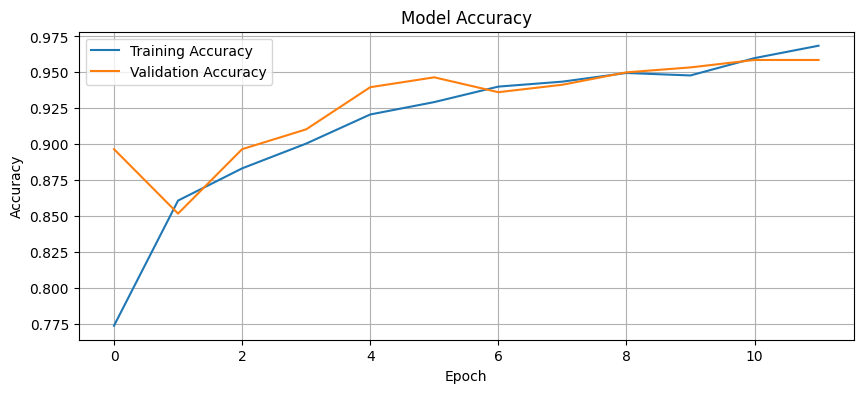

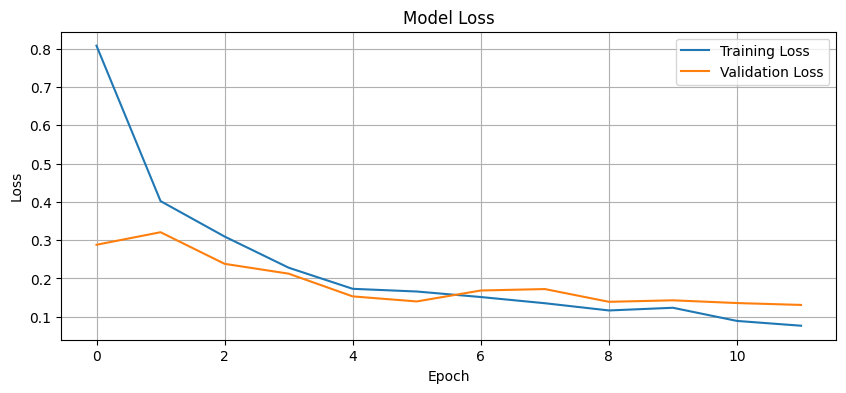

In [53]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
model.save("drowsiness_mobilenetv2.h5")

/opt/anaconda3/envs/drowsy/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Prediction

In [47]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.argmax(y_test, axis=1)

19/19 [==============================] - 2s 56ms/step


Classification Report

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

labels_new = ["yawn", "no_yawn", "Closed", "Open"]

print(classification_report(y_true, y_pred, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       1.00      0.99      1.00       151
     no_yawn       0.91      0.93      0.92       141
      Closed       0.93      0.91      0.92       149
        Open       0.99      1.00      1.00       139

    accuracy                           0.96       580
   macro avg       0.96      0.96      0.96       580
weighted avg       0.96      0.96      0.96       580



# predicting function

In [51]:
import os

for folder in ["yawn", "no_yawn", "Closed", "Open"]:
    path = os.path.join("train", folder)
    print(f"\n📂 {folder} -> Sample files:")
    print(os.listdir(path)[:5])  # show first 5 files



📂 yawn -> Sample files:
['63.jpg', '189.jpg', '77.jpg', '638.jpg', '604.jpg']

📂 no_yawn -> Sample files:
['77.jpg', '837.jpg', '638.jpg', '176.jpg', '610.jpg']

📂 Closed -> Sample files:
['_80.jpg', '_94.jpg', '_569.jpg', '_541.jpg', '_227.jpg']

📂 Open -> Sample files:
['_80.jpg', '_94.jpg', '_569.jpg', '_541.jpg', '_227.jpg']


In [52]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load trained model
model = load_model("drowsiness_mobilenetv2.h5")

labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145

def prepare(filepath):
    img = cv2.imread(filepath)
    if img is None:
        print("❌ ERROR: Wrong image path:", filepath)
        return None
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def predict_image(filepath):
    img = prepare(filepath)
    if img is None:
        return
    prediction = model.predict(img)
    class_id = np.argmax(prediction)
    print(f"✅ Predicted Class: {class_id} → {labels_new[class_id]}")

# Test Predictions
predict_image("train/yawn/63.jpg")
predict_image("train/no_yawn/77.jpg")
predict_image("train/Closed/_80.jpg")
predict_image("train/Open/_80.jpg")

1/1 [==============================] - 1s 688ms/step
✅ Predicted Class: 2 → Closed
1/1 [==============================] - 0s 27ms/step
✅ Predicted Class: 1 → no_yawn
1/1 [==============================] - 0s 20ms/step
✅ Predicted Class: 0 → yawn
1/1 [==============================] - 0s 31ms/step
✅ Predicted Class: 3 → Open
